<a href="https://colab.research.google.com/github/AbooMardiiyah/SNDSHackathon21_dog_breed/blob/main/SNHACK_Dog_breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**
 

This project is a computer vision project for classifying dogs into their respective breeds.The motivation for this is that we see different types of dogs everyday in movies, streets, pictures, on social media and we might be interested in buying them for security reasons and its cool if we know the breeds of dogs we are buying or viewing on socail media.

Link to dataset: https://www.kaggle.com/c/dog-breed-identification/data

In [4]:
# Import tensorflow and tensorflow hub
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# Check the versions of tensorflow and tensorflowhub
print('TensorFlow version:',tf.__version__)
print('Tensorflow_hub version:',hub.__version__)


In [6]:
# let's check if GPU is available
print("GPU","available(yeah nigga)" if tf.config.list_physical_devices("GPU") else "Not available :(")

GPU Not available :(


Since we are going to be dealing with images, we need to change the "run time type " to a GPU for faster computing

In [7]:
print("GPU:","available(yeah nigga :))" if tf.config.list_physical_devices("GPU") else "Not available :(")

GPU: Not available :(


Loading the dataset into Colab.
we first of all mount the drive and then we load into the notebook using pandas and view the image using python's functionality

In [8]:
import pandas as pd
from IPython.display import Image

In [9]:
csv_file=pd.read_csv('drive/MyDrive/dog-vision/labels.csv')
csv_file.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
csv_file.describe()

,id,breed
count,10222,10222
unique,10222,120
top,72a718aa575dba137f8c54c69896acdf,scottish_deerhound
freq,1,126


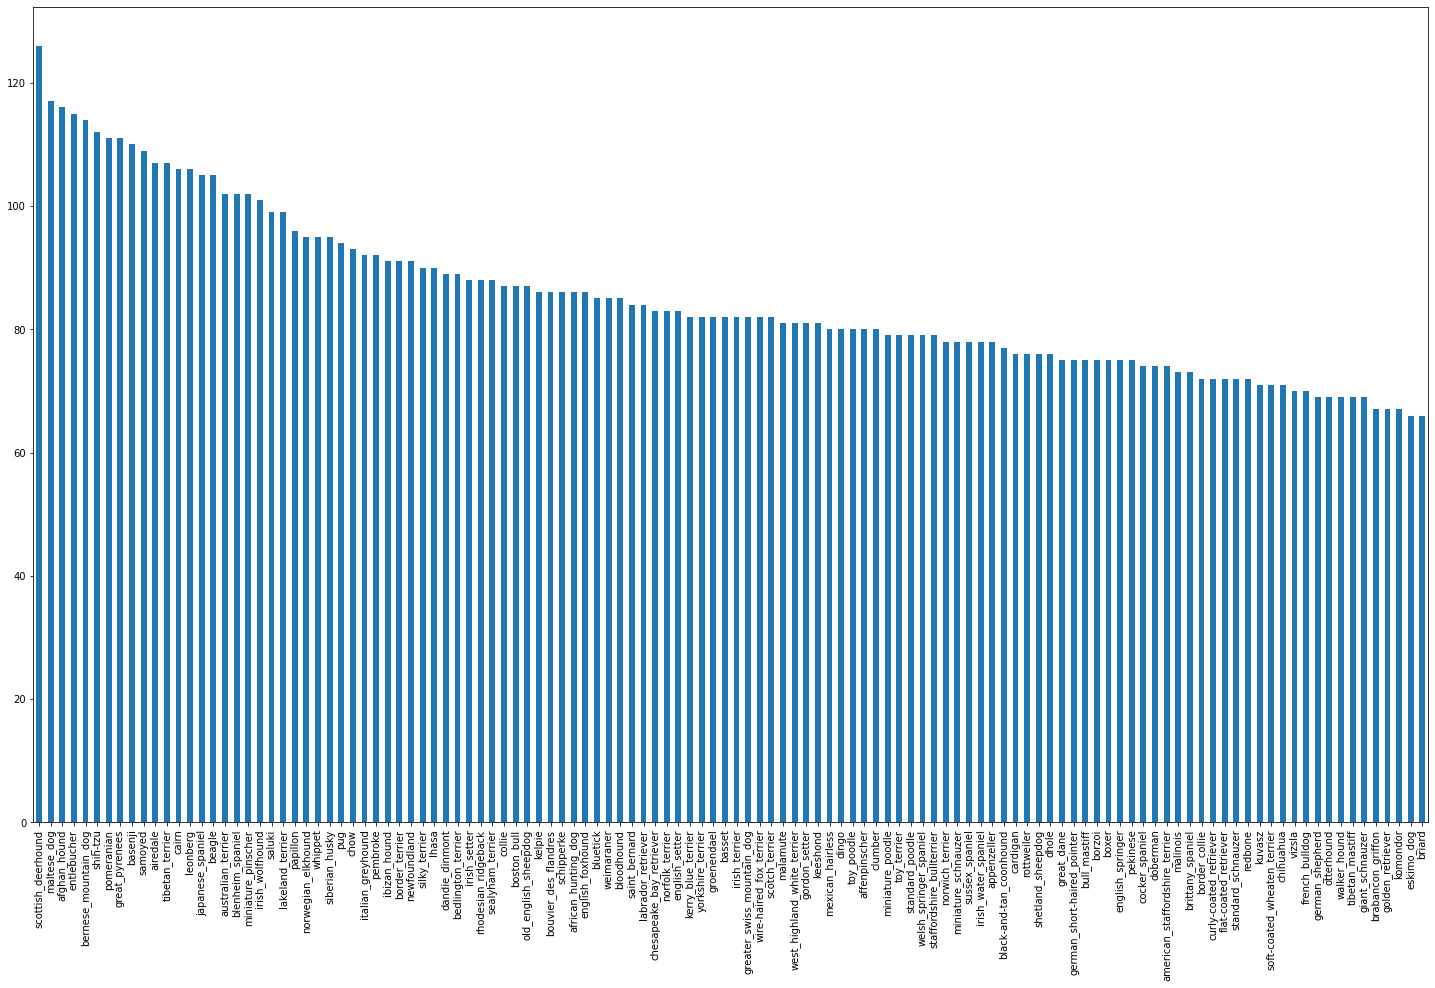

In [11]:
# check the counts of each breed
csv_file['breed'].value_counts().plot(kind='bar',figsize=(25,15))

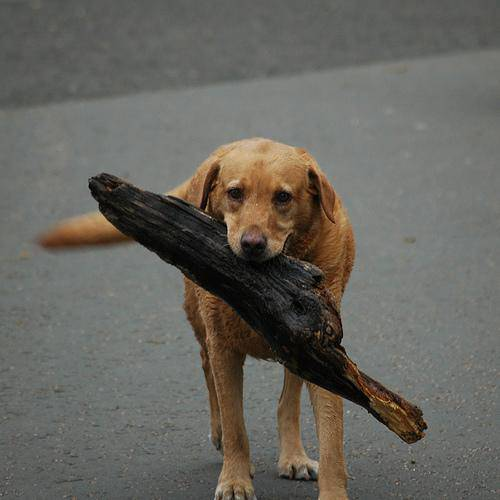

In [12]:
#let's view an image
Image('drive/My Drive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

In [13]:
#create a list of file names
filenames=['drive/My Drive/dog-vision/train/'+id+'.jpg' for id in csv_file.id]

In [14]:
filenames[:15]

['drive/My Drive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/dog-vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/dog-vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/dog-vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/dog-vision/train/006cc3ddb9dc1bd82

In [15]:
 import os
len(filenames),len(os.listdir('drive/MyDrive/dog-vision/train'))

(10222, 10222)

In [16]:
# let's view the breeds in a numpy array
import numpy as np
labels=csv_file.breed.to_numpy()
labels,len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

CHECK FOR UNIQUE BREEDS
from kaggle, we learnt there are 120 unique breeds of dogs, so we ar going to check for that now.

In [17]:
unique_breeds=np.unique(labels)
print(len(unique_breeds))

120


In [18]:
# we are going to create an array of boolean values which is true where the breed is the same as that from the unique breed
bool_labels=[label ==unique_breeds for label in labels]
bool_labels[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
labels[1]

'dingo'

In [20]:
#let's check for the index with the max value( in this case "Boolean True") and the breed with that value
bool_labels[1].argmax(),unique_breeds[bool_labels[1].argmax()]

(37, 'dingo')

DATA SPLITTING
we are going to start off with 1500 images and also create a slider so that we can adjust the values if we want

In [21]:
NUM_IMAGES=1500 #@param {type:'slider',min:1500,max:15000,step:1500} 

In [22]:
from sklearn.model_selection import train_test_split
X=filenames
y=bool_labels
xtrain,xval,ytrain,yval=train_test_split(X[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             train_size=0.8,
                                             random_state=42)

#IMAGE PREPROCESSING:

* we are going to make an helper function that will take in the image file path
* read the image 
* decode the image into numbers(tensors)
* resize and finally return the image

In [23]:
IMG_SIZE=224
def preprocess_image(imagepath,img_size=IMG_SIZE):
  # read the images 
  image=tf.io.read_file(imagepath)

  # convert the images into tensors with RGB
  image=tf.image.decode_jpeg(image,channels=3)
  # normalize the tensor values to lie between 0 and 1
  image=tf.image.convert_image_dtype(image,tf.float32)

  # resizing the images into a square form of size 250 by 250
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

#Turning our data into mini batches
#get our data in the form of `(image,label)`

* this function is basically the same as above, only difference is that it returns the images and their labels. 
* we are going to use the yan lecunn's batch size of 32


In [24]:
def get_image_label(imagepath,label):
  image=preprocess_image(imagepath)
  return image,label

In [25]:
BATCH_SIZE=32
def create_batch_sizes(X,y=None,test_data=False,valid_data=False,batch_size=BATCH_SIZE):
  """
  if training data,shuffles it else if its test data, doesnt shuffle it,
  also accepts test data as input."""
  if test_data:
    print('creating test batch......')
    data=tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch=data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    print('creating valid batch......')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print('creating training batch.......')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data=data.shuffle(buffer_size=len(X))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [26]:
train_data=create_batch_sizes(xtrain,ytrain)
val_data=create_batch_sizes(xval,yval,valid_data=True)

creating training batch.......
creating valid batch......


#Visualizing the DATA in the batches created above

In [27]:
import matplotlib.pyplot as plt
def show_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')

In [28]:
train_images,train_labels=next(train_data.as_numpy_iterator())

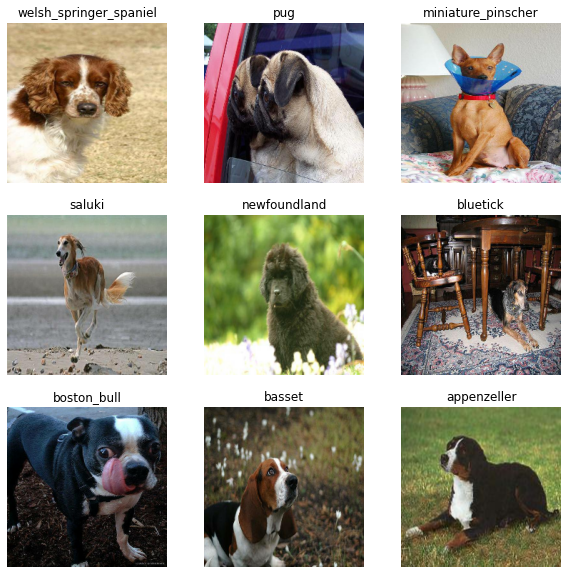

In [29]:
show_images(train_images,train_labels)

In [30]:
# let's check for the validation batch data
val_images,val_label=next(val_data.as_numpy_iterator())

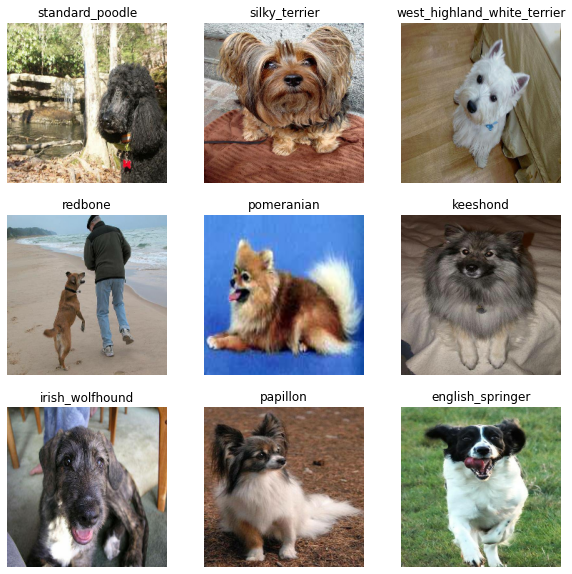

In [31]:
show_images(val_images,val_label)

#BUILDING THE MACHINE LEARNING MODEL
 * i am going to be using a pretrained model from Imagenet.ill take advantage of the the mobilenet_v2 classifier

In [32]:
# setup input shape to our model]
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

# setup output shape of the model

OUTPUT_SHAPE=len(unique_breeds)
#set up our model from TensorFlowHub

MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [33]:
#create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  
  #setup the input layers
  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL),#input layer
                            tf.keras.layers.Dense(units=OUTPUT_SHAPE ,activation='softmax') #output layer
                             ])
  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy'])
  #Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [34]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Training OUR Data

* create an early stopping call back

* write an helper function that will train the model


In [35]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [36]:
NUM_EPOCHS=100  #@param {type:'slider',min:10,max:100,step:10}

In [39]:
 # build a fucntion to train a model
def train_model():
  model=create_model()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[early_stopping])
  return model

In [40]:
trained_model=train_model()

Epoch 1/100
38/38 [==============================] - 713s 19s/step - loss: 4.7959 - accuracy: 0.0838 - val_loss: 2.5177 - val_accuracy: 0.4200
Epoch 2/100
38/38 [==============================] - 64s 2s/step - loss: 1.2937 - accuracy: 0.7581 - val_loss: 1.4850 - val_accuracy: 0.6133
Epoch 3/100
38/38 [==============================] - 64s 2s/step - loss: 0.4017 - accuracy: 0.9544 - val_loss: 1.2414 - val_accuracy: 0.6933
Epoch 4/100
38/38 [==============================] - 64s 2s/step - loss: 0.2048 - accuracy: 0.9877 - val_loss: 1.1606 - val_accuracy: 0.6900
Epoch 5/100
38/38 [==============================] - 64s 2s/step - loss: 0.1294 - accuracy: 0.9976 - val_loss: 1.0938 - val_accuracy: 0.7033
Epoch 6/100
38/38 [==============================] - 64s 2s/step - loss: 0.0846 - accuracy: 1.0000 - val_loss: 1.0717 - val_accuracy: 0.7000
Epoch 7/100
38/38 [==============================] - 64s 2s/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 1.0592 - val_accuracy: 0.6967
Epoch 8/100

#Prediction and Evaluation
* we are going to write an helper function that will receive the predictions(probabilities values) and return the label(breed) with the highest probability value.

In [41]:
predictions=trained_model.predict(val_data,verbose=1)
predictions

10/10 [==============================] - 14s 1s/step


array([[1.76203102e-04, 2.17643753e-03, 7.42398028e-04, ...,
        2.94781876e-05, 3.39678605e-04, 3.67456346e-06],
       [1.94800668e-04, 1.15700459e-04, 5.66432645e-05, ...,
        1.91822346e-05, 2.08363817e-05, 2.78520249e-02],
       [1.43666402e-04, 3.05385583e-05, 1.82082877e-04, ...,
        8.55087183e-06, 3.86018131e-04, 1.93040655e-03],
       ...,
       [6.02784450e-04, 1.77234109e-03, 1.00677375e-04, ...,
        3.10175456e-05, 1.12760521e-04, 6.55430495e-06],
       [8.84359633e-06, 4.48942956e-06, 1.25281413e-05, ...,
        1.31426958e-07, 1.38653445e-06, 1.23206788e-04],
       [8.64454269e-05, 2.75949369e-05, 1.45734130e-05, ...,
        1.62527322e-05, 1.64845587e-05, 2.89029791e-04]], dtype=float32)

In [43]:
# turn prediction probabilities into easier labels to understand
def get_pred_label(prediction_probabilities):
  """
  Turns an array of predicted probabilities into labels
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label=get_pred_label(predictions[42])
pred_label

'irish_terrier'

In [44]:
# create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batch data of (images,labels) and returns a separate array of images and labels
  """
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

In [45]:
#unbatch the validation data
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.8268084 , 0.87778884, 0.7004078 ],
         [0.6187892 , 0.6546785 , 0.4486211 ],
         [0.5687251 , 0.5795444 , 0.37021554],
         ...,
         [0.50412035, 0.430871  , 0.31312123],
         [0.4577594 , 0.39109275, 0.27344567],
         [0.4720942 , 0.40542755, 0.28940907]],
 
        [[0.80234873, 0.8557451 , 0.668105  ],
         [0.6145899 , 0.65047926, 0.43657872],
         [0.5239124 , 0.5347317 , 0.32053345],
         ...,
         [0.6066145 , 0.5334421 , 0.4162012 ],
         [0.494317  , 0.41588563, 0.31009743],
         [0.6022375 , 0.52380615, 0.42283303]],
 
        [[0.8199738 , 0.8744019 , 0.6803554 ],
         [0.70151967, 0.73740906, 0.51854175],
         [0.75504184, 0.76833254, 0.54100406],
         ...,
         [0.91317713, 0.8468256 , 0.74259466],
         [0.65882725, 0.5773006 , 0.49019808],
         [0.6000929 , 0.51628685, 0.43023118]],
 
        ...,
 
        [[0.930187  , 0.7882501 , 0.59816927],
         [0.843736  , 0.6940772 , 0.55340

In [46]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  view the prediction, ground truth and image for sample n
  """
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  # get the pred label
  pred_label=get_pred_label(pred_prob)
  # plot image and ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # add color to distinguish the pre label from true label
  if pred_label==true_label:
    color='green'
  else:
    color='red'

  #change plot title to be predicted,probability of prediction and true label
  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label ),color=color)

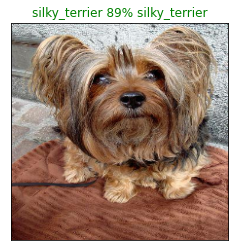

In [47]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

# EVALUATING THE MODEL

* we are going to test how well our model is behaving on our own created validation data.
* we will need to train the model on more data

In [48]:
 evaluation=model.evaluate(val_data)
 evaluation

10/10 [==============================] - 14s 1s/step - loss: 5.6992 - accuracy: 0.0093


[5.601836204528809, 0.009999999776482582]

The accuracy is low because we only trained on a few data(1500) images comapared to 10000+ images. time might not permit me to train on full data but one thing for sure is that the accuracy will increase when we train on full data

# Training on Full data
the model can be saved and trained on full data but this will take several hours and i have limited time for submission. So in this hackathon, i am going to train on just 1500 images. Train on full data is similar, just pass in the whole data instead of splitting into train and validation data